In [1]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

# Data Import

In [2]:
os.chdir("/Volumes/GoogleDrive/My Drive/PROJECT/Data/Aging Biomarkers/African")

data1 = pd.read_csv('34187551-GCST90014294-GO_0007568.h.tsv.gz', sep='\t')
data2 = pd.read_csv('34187551-GCST90014295-GO_0007568.h.tsv.gz', sep='\t')
data3 = pd.read_csv('34187551-GCST90014296-GO_0007568.h.tsv.gz', sep='\t')
data4 = pd.read_csv('34187551-GCST90014298-GO_0007568.h.tsv.gz', sep='\t')

In [3]:
data1.head()

,hm_variant_id,hm_rsid,hm_chrom,hm_pos,hm_other_allele,hm_effect_allele,hm_beta,hm_odds_ratio,hm_ci_lower,hm_ci_upper,...,effect_allele,other_allele,effect_allele_frequency,beta,standard_error,p_value,n,odds_ratio,ci_lower,ci_upper
0,1_159204893_T_C,rs2814778,1.0,159204893.0,T,C,-0.7106,NaN,NaN,NaN,...,t,c,0.1886,0.7106,0.1324,8.064000e-08,4904,NaN,NaN,NaN
1,1_115359934_T_C,rs58636529,1.0,115359934.0,T,C,1.1421,NaN,NaN,NaN,...,t,c,0.9437,-1.1421,0.2131,8.398000e-08,5822,NaN,NaN,NaN
2,1_204834538_C_T,rs80046580,1.0,204834538.0,C,T,1.2492,NaN,NaN,NaN,...,t,c,0.0447,1.2492,0.2341,9.466000e-08,5649,NaN,NaN,NaN
3,1_115366702_A_G,rs75188212,1.0,115366702.0,A,G,1.2007,NaN,NaN,NaN,...,a,g,0.9501,-1.2007,0.2262,1.104000e-07,5643,NaN,NaN,NaN
4,1_115358372_A_T,rs11586053,1.0,115358372.0,A,T,1.1351,NaN,NaN,NaN,...,a,t,0.9439,-1.1351,0.2145,1.209000e-07,5896,NaN,NaN,NaN


# Filtering

In [4]:
data1_filtered = data1.iloc[np.where(data1['p_value']<0.06)]
data2_filtered = data2.iloc[np.where(data2['p_value']<0.06)]
data3_filtered = data3.iloc[np.where(data3['p_value']<0.06)]
data4_filtered = data4.iloc[np.where(data4['p_value']<0.06)]

In [5]:
l1 = list(set(data1_filtered['hm_rsid']).intersection(data2_filtered['hm_rsid']))
l2 = list(set(l1).intersection(data3_filtered['hm_rsid']))
l3 = list(set(l2).intersection(data4_filtered['hm_rsid']))

In [6]:
snp_index = pd.DataFrame(l3).dropna()
print(snp_index)

                0
1       rs7976751
2       rs2388621
3      rs77114878
4      rs17339012
5      rs77853198
...           ...
13835  rs11661582
13836  rs35167886
13837   rs3016022
13838   rs2177658
13839   rs6795797

[13839 rows x 1 columns]


# Filtering 2

In [7]:
l_1 = list(set(data1_filtered['hm_pos']).intersection(data2_filtered['hm_pos']))
l_2 = list(set(l_1).intersection(data3_filtered['hm_pos']))
l_3 = list(set(l_2).intersection(data4_filtered['hm_pos']))

In [8]:
pos_index = pd.DataFrame(l_3).dropna()
print(pos_index)

                 0
0       45711361.0
1      103972868.0
2       45776901.0
3       42205190.0
4       85098508.0
...            ...
14710   76316662.0
14711    7208954.0
14712  105906171.0
14713   41877500.0
14714   46563327.0

[14715 rows x 1 columns]


In [118]:
for i in pos_index[0]: i = int(i)

In [123]:
poss_index = pos_index[0].astype(int).astype(str)

In [125]:
poss_index.to_csv("poss_index.csv")

# Preparation

In [9]:
TRAIT_1 = data1[
    ['hm_other_allele','hm_effect_allele','beta','standard_error']
]
TRAIT_1=TRAIT_1.rename(columns={
                                    "hm_other_allele":"allele_0",
                                    "hm_effect_allele":"allele_1",
                                    "beta":"trait1_b",
                                    "standard_error":'trait1_se'})
TRAIT_1.index = data1.hm_rsid
TRAIT_1 = TRAIT_1.loc[list(snp_index[0])]

In [10]:
TRAIT_2 = data2[
    ['beta','standard_error']
]

TRAIT_2.index = data2.hm_rsid
TRAIT_2 = TRAIT_2.loc[list(snp_index[0])]

In [11]:
TRAIT_3 = data3[
    ['beta','standard_error']
]

TRAIT_3.index = data3.hm_rsid
TRAIT_3 = TRAIT_3.loc[list(snp_index[0])]

In [12]:
TRAIT_4 = data4[
    ['beta','standard_error']
]

TRAIT_4.index = data4.hm_rsid
TRAIT_4 = TRAIT_4.loc[list(snp_index[0])]

# Combination

In [13]:
S_XY = TRAIT_1
S_XY['trait2_b']=TRAIT_2['beta']
S_XY['trait2_se']=TRAIT_2['standard_error']
S_XY['trait3_b']=TRAIT_3['beta']
S_XY['trait3_se']=TRAIT_3['standard_error']
S_XY['trait4_b']=TRAIT_4['beta']
S_XY['trait4_se']=TRAIT_4['standard_error']

# S_XY Export

In [14]:
S_XY.to_csv('Jupyter_Exports/S_XY_African.csv',index=True)

# Results Import

In [15]:
results = pd.read_csv('Jupyter_Exports/African_Results.csv',index_col=0)


In [16]:
p_values = 10**(-results['-log10(p-val)'])
print("Number of significant associations BEFORE correction: ",len(p_values.iloc[np.where(p_values<0.05)]))

Number of significant associations BEFORE correction:  11502


# Bonferroni correction

In [17]:
adjusted_p_values=p_values*len(data1)
p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]
print("Number of significant associations AFTER correction: ",len(p_values_corrected))

Number of significant associations AFTER correction:  1715


# Published Associations

In [18]:
response = requests.get('https://www.ebi.ac.uk/gwas/rest/api/efoTraits/GO_0007568/associations')
GWAS_EBI=response.json()

In [19]:
published_snps=[]
for i in range(len(GWAS_EBI['_embedded']['associations'])):
    published_snps.append(GWAS_EBI['_embedded']['associations'][i]['loci'][0]['strongestRiskAlleles'][0]['riskAlleleName'])
    
print("Number of PUBLISHED significant associations: ",len(published_snps))

Number of PUBLISHED significant associations:  209


In [20]:
#print('Published SNPS with significant associations: \n\n',published_snps)

# Plotting

/Users/datasandwich/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'RefSNP ID Index')

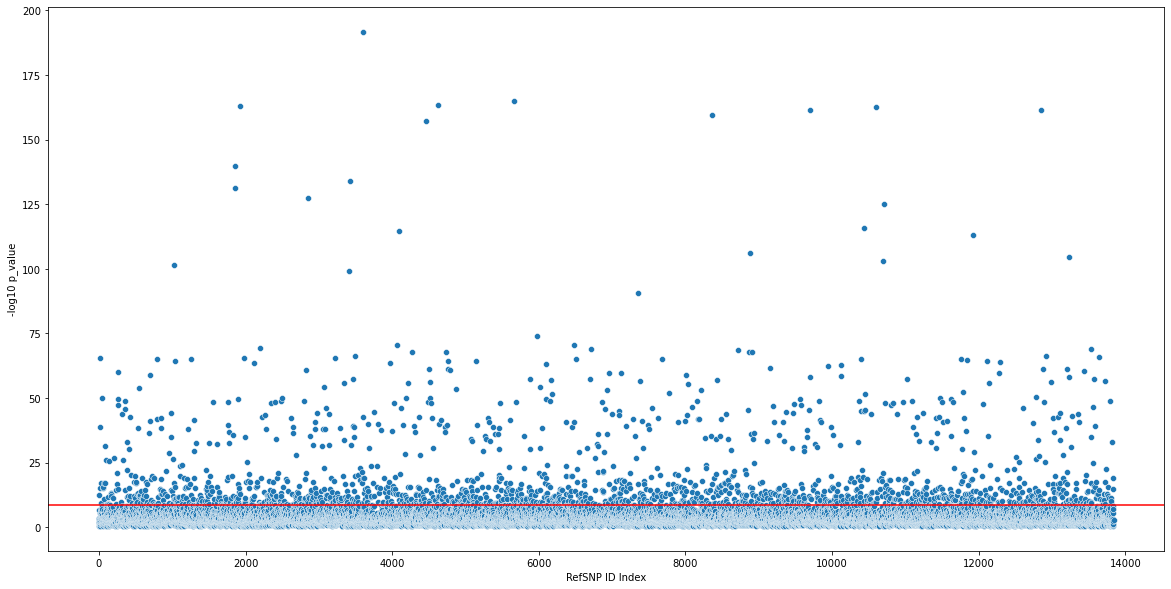

In [21]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.scatterplot(x=range(len(p_values.index)),y=-np.log10(p_values))
plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-')
plt.ylabel('-log10 p_value')
plt.xlabel('RefSNP ID Index')

/Users/datasandwich/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'Chromosome ID')

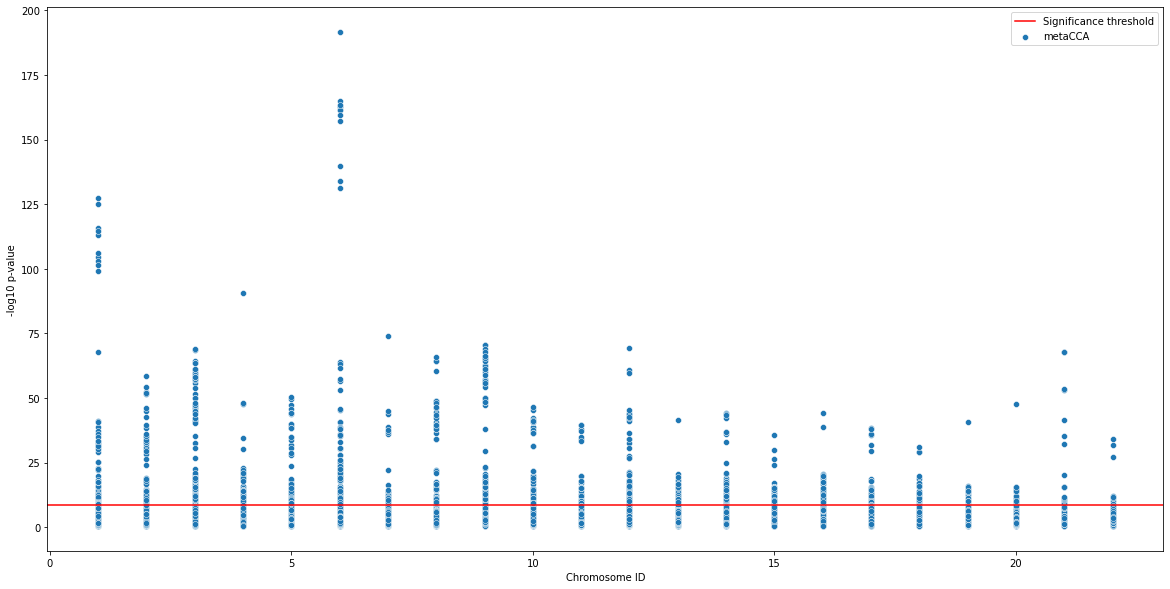

In [31]:
import seaborn as sns
data1.index = data1.hm_rsid
plt.figure(figsize=(20,10))
sns.scatterplot(x=data1.loc[list(snp_index[0])].hm_chrom,y=-np.log10(p_values),label = "metaCCA")
plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-', label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

Text(0.5, 0, 'Chromosome ID')

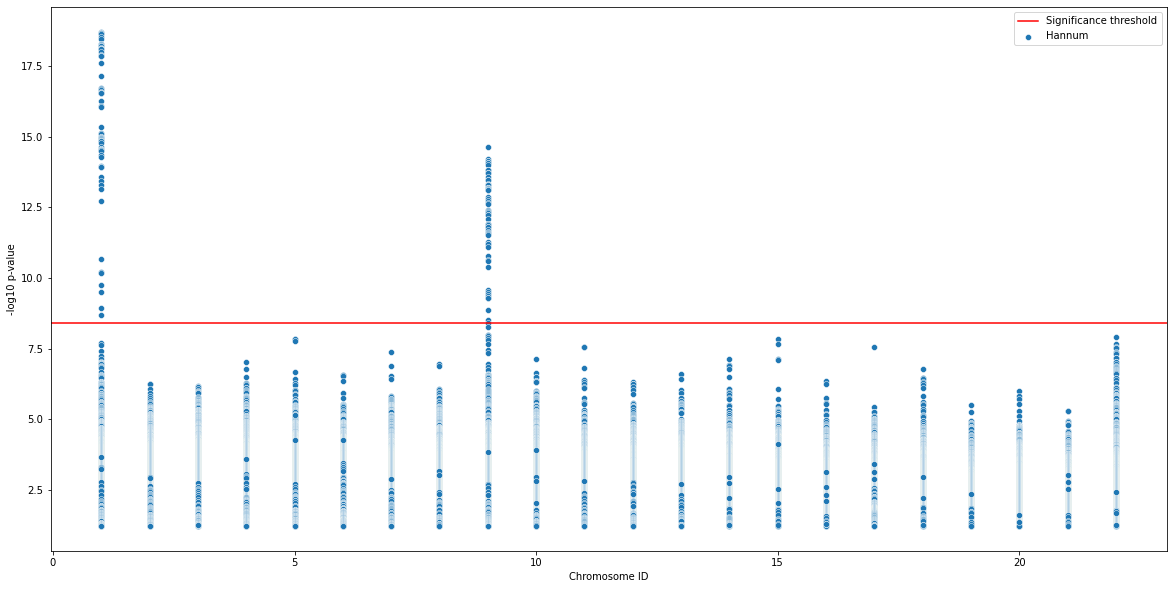

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data2_filtered.hm_chrom,y=-np.log10(data2_filtered.p_value), label = "Hannum")
plt.axhline(y = -np.log10(0.05/len(data2)), color = 'r', linestyle = '-',label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

Text(0.5, 0, 'Chromosome ID')

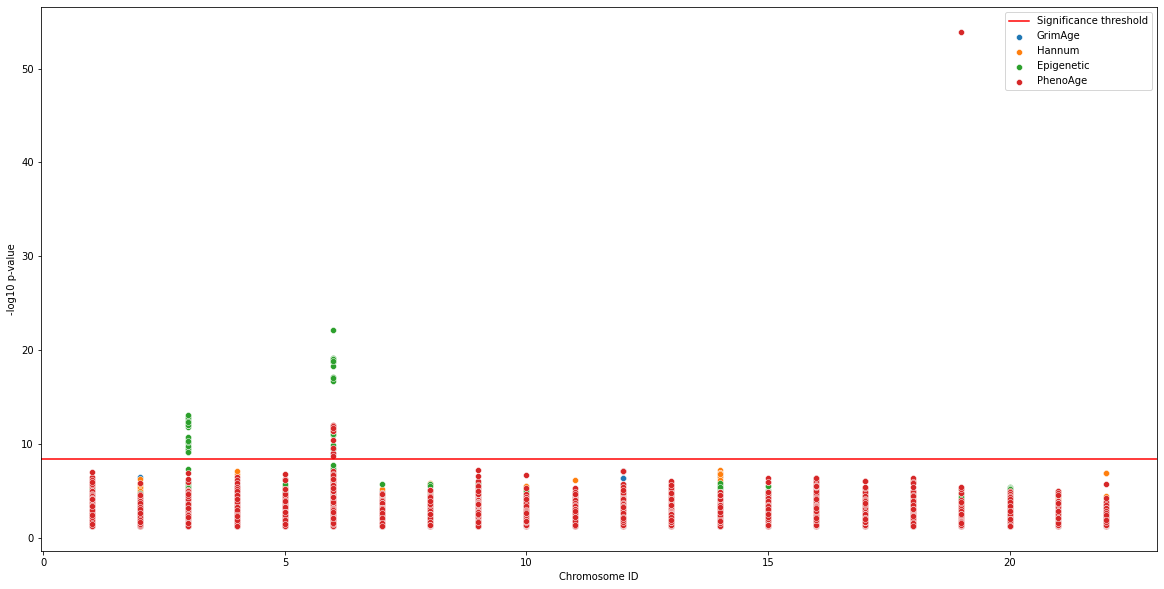

In [33]:
data2.index = data2.hm_rsid
data3.index = data3.hm_rsid
data4.index = data4.hm_rsid

plt.figure(figsize=(20,10))
sns.scatterplot(x=data1.loc[list(snp_index[0])].hm_chrom,y=-np.log10(data1.loc[list(snp_index[0])].p_value),label="GrimAge")
sns.scatterplot(x=data2.loc[list(snp_index[0])].hm_chrom,y=-np.log10(data2.loc[list(snp_index[0])].p_value),label="Hannum")
sns.scatterplot(x=data3.loc[list(snp_index[0])].hm_chrom,y=-np.log10(data3.loc[list(snp_index[0])].p_value),label="Epigenetic")
sns.scatterplot(x=data4.loc[list(snp_index[0])].hm_chrom,y=-np.log10(data4.loc[list(snp_index[0])].p_value),label="PhenoAge")

plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-',label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

# Experimentation

In [22]:
results.head()

,r_1,-log10(p-val)
rs4054578,0.068312,12.529019
rs180743202,0.017844,0.451190
rs111566648,0.037353,3.166965
rs75508175,0.029095,1.707937
rs111349036,0.051885,6.805118


In [23]:
os.chdir("/Volumes/GoogleDrive/My Drive/PROJECT/Data/Aging Biomarkers/European")
E_results = pd.read_csv('Jupyter_Exports/European_Results.csv',index_col=0)

In [24]:
print("Common SNPs between African and European populatiosn: ",len(list(set(results.index).intersection(E_results.index))))

Common SNPs between African and European populatiosn:  77


# The S_XX matrix is 4300 rows × 10880 columns, which doesn't make any sense



In [2]:
os.chdir("/Volumes/GoogleDrive/My Drive/PROJECT/Data/Aging Biomarkers/")


In [3]:
S_XX = pd.read_csv('Complete_genotypic_correlation_matrix.csv')

In [4]:
#S_XX[pos_index.astype('int').astype('str').iloc[:10]]

In [5]:
S_XX.columns

Index(['Unnamed: 0', '105444', '114934', '127976', '144668', '149986',
       '156208', '168728', '234877', '236091',
       ...
       '247419664', '247582310', '247587408', '247600301', '247752367',
       '247875543', '247972002', '248515194', '248790167', '248855612'],
      dtype='object', length=10880)

In [6]:
pos_index.astype('int').astype('str').iloc[50]

NameError: name 'pos_index' is not defined

In [7]:
S_XX

,Unnamed: 0,105444,114934,127976,144668,149986,156208,168728,234877,236091,...,247419664,247582310,247587408,247600301,247752367,247875543,247972002,248515194,248790167,248855612
0,105444,1.000000,0.271504,-0.028114,0.026698,-0.021043,-0.028012,-0.032944,0.150189,-0.035767,...,0.079803,0.043502,0.062927,0.068123,0.096446,0.116308,0.016150,NaN,-0.027316,0.063540
1,114934,0.271504,1.000000,-0.007523,-0.017613,-0.074673,-0.007262,-0.034287,0.053754,0.036166,...,0.023613,-0.009926,-0.054583,0.060735,-0.116464,-0.042552,-0.010221,NaN,-0.007239,-0.118972
2,127976,-0.028114,-0.007523,1.000000,-0.009777,-0.036998,-0.003976,0.034991,-0.127836,0.059649,...,-0.037709,0.050605,0.067397,-0.056966,0.043658,-0.061987,-0.000407,NaN,-0.000144,0.023077
3,144668,0.026698,-0.017613,-0.009777,1.000000,-0.013666,-0.010343,0.001362,0.056218,0.076776,...,0.062265,0.044855,0.089670,-0.002707,-0.065968,-0.055094,-0.013189,NaN,-0.008380,0.003413
4,149986,-0.021043,-0.074673,-0.036998,-0.013666,1.000000,0.067479,0.026245,0.042640,-0.068735,...,0.044927,0.143118,-0.010412,0.067034,0.029119,0.015393,-0.048813,NaN,0.066430,-0.124145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,50403449,0.030410,0.042312,0.005849,-0.044606,0.065806,0.006400,-0.060938,-0.058148,0.136819,...,0.017245,-0.007262,0.047009,0.029517,-0.031762,-0.084468,-0.098837,NaN,0.005861,0.047490
4296,50404182,-0.073346,-0.045864,0.071870,0.064470,-0.059754,-0.010015,0.016071,-0.148039,0.007474,...,-0.086162,-0.042677,0.006522,-0.152495,0.038922,-0.090645,0.057078,NaN,-0.009174,0.164313
4297,50421830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,50443840,0.049218,-0.028691,0.039452,0.156523,-0.000266,-0.052786,0.082134,0.037024,-0.106188,...,0.069590,-0.002715,0.024911,0.068351,0.052030,0.058367,-0.068762,NaN,0.129617,-0.086202


# Experiment 2

In [45]:
os.chdir("/Volumes/GoogleDrive/My Drive/PROJECT/Data/Aging Biomarkers/European")

E_results = pd.read_csv('Jupyter_Exports/European_Results.csv',index_col=0)

In [46]:
results

,r_1,-log10(p-val)
rs4054578,0.068312,12.529019
rs180743202,0.017844,0.451190
rs111566648,0.037353,3.166965
rs75508175,0.029095,1.707937
rs111349036,0.051885,6.805118
...,...,...
rs13004980,0.083150,19.152930
rs113735748,0.026050,1.283832
rs147801507,0.052184,6.894276
rs12420597,0.033063,2.353183


In [52]:
E_results
E_p_values = 10**(-E_results['-log10(p-val)'])
print("Number of significant associations BEFORE correction: ",len(E_p_values.iloc[np.where(E_p_values<0.05)]))
E_adjusted_p_values=E_p_values*len(data1)
E_p_values_corrected = E_adjusted_p_values.iloc[np.where(E_adjusted_p_values<0.05)]
print("Number of significant associations AFTER correction: ",len(E_p_values_corrected))

Number of significant associations BEFORE correction:  5859
Number of significant associations AFTER correction:  1694


In [48]:
p_values

rs4054578      2.957886e-13
rs180743202    3.538426e-01
rs111566648    6.808246e-04
rs75508175     1.959131e-02
rs111349036    1.566326e-07
                   ...     
rs13004980     7.031862e-20
rs113735748    5.201969e-02
rs147801507    1.275627e-07
rs12420597     4.434221e-03
rs1542763      2.124882e-03
Name: -log10(p-val), Length: 13839, dtype: float64

In [50]:
p_values_corrected

rs4054578      3.842018e-06
rs80198830     2.401721e-32
rs73095422     7.613995e-09
rs17630659     3.834597e-59
rs749840       7.871700e-11
                   ...     
rs138990387    9.001982e-03
rs73602208     7.640681e-04
rs76783622     1.495515e-26
rs73008148     1.554843e-08
rs13004980     9.133735e-13
Name: -log10(p-val), Length: 1715, dtype: float64

In [100]:
Common_snps = pd.DataFrame(list(set(p_values.index).intersection(E_p_values.index)))

In [101]:
len(Common_snps)

77

In [102]:
Common_snps.to_csv('Jupyter_Exports/Common_snps_77.csv',index=True)

In [109]:
g=[]
for i in range(len(p_values)):
        g.append(np.where(data1_filtered.hm_rsid==p_values_corrected.index[i]))
        

Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
P

Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
Progress
P

IndexError: index 1715 is out of bounds for axis 0 with size 1715

In [110]:
f=[]
for i in range(len(g)):
        f.append(int(data1_filtered.iloc[g[i]].hm_pos))


In [111]:
pd.DataFrame(f).to_csv("f_E.csv")

In [106]:
p_values

rs4054578      2.957886e-13
rs180743202    3.538426e-01
rs111566648    6.808246e-04
rs75508175     1.959131e-02
rs111349036    1.566326e-07
                   ...     
rs13004980     7.031862e-20
rs113735748    5.201969e-02
rs147801507    1.275627e-07
rs12420597     4.434221e-03
rs1542763      2.124882e-03
Name: -log10(p-val), Length: 13839, dtype: float64

In [126]:
The_poss_index_which_were_found_in_the_S_XX_matrix = ['101639845','4069615','90011255']

# Code copied from the European notebook

In [ ]:
result = []
p_value = []
significant_p_value = []
for CHROM in range(23):
    results = pd.read_csv('Jupyter_Exports/Results_Chrom_{}.csv'.format(CHROM+1),index_col=0)
    
    p_values = 10**(-results['-log10(p-val)'])
    p_value.append(p_values)
    print("Number of significant associations in Chromosome {} BEFORE correction: ".format(CHROM+1)
          ,len(p_values.iloc[np.where(p_values<0.05)]))
    
    adjusted_p_values = p_values*len(data1)
    significant_p_value.extend(results.index[np.where(adjusted_p_values<0.05)])

    p_values_corrected = adjusted_p_values.iloc[np.where(adjusted_p_values<0.05)]
    print("Number of significant associations in Chromosome {} AFTER correction: ".format(CHROM+1),len(p_values_corrected))

In [ ]:
import seaborn as sns
data1.index = data1.hm_rsid
plt.figure(figsize=(20,10))
for CHROM in range(23):
    sns.scatterplot(x=data1.loc[p_value[CHROM].index].hm_chrom,y=-np.log10(p_value[CHROM]),color='b')#label="Chromosome {}".format(CHROM+1))
plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-', label = "Significance threshold")
#plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

In [ ]:
data2.index = data2.hm_rsid
data3.index = data3.hm_rsid
data4.index = data4.hm_rsid

plt.figure(figsize=(20,10))

sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[0])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[0])].p_value),color='b',label="GrimAge")
sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[0])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[0])].p_value),color='r',label="Hannum")
sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[0])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[0])].p_value),color='g',label="Epigenetic")
sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[0])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[0])].p_value),color='y',label="PhenoAge")

for i in range(22):
    sns.scatterplot(x=data1.loc[list(filtered_snp_index_1[i+1])].hm_chrom,y=-np.log10(data1.loc[list(filtered_snp_index_1[i+1])].p_value),color='b')#,label="GrimAge")
    sns.scatterplot(x=data2.loc[list(filtered_snp_index_2[i+1])].hm_chrom,y=-np.log10(data2.loc[list(filtered_snp_index_2[i+1])].p_value),color='r')#,label="Hannum")
    sns.scatterplot(x=data3.loc[list(filtered_snp_index_3[i+1])].hm_chrom,y=-np.log10(data3.loc[list(filtered_snp_index_3[i+1])].p_value),color='g')#,label="Epigenetic")
    sns.scatterplot(x=data4.loc[list(filtered_snp_index_4[i+1])].hm_chrom,y=-np.log10(data4.loc[list(filtered_snp_index_4[i+1])].p_value),color='y')#,label="PhenoAge")

plt.axhline(y = -np.log10(0.05/len(data1)), color = 'r', linestyle = '-',label = "Significance threshold")
plt.legend()
plt.ylabel('-log10 p-value')
plt.xlabel('Chromosome ID')

In [ ]:
significant_snps_gwas = []
significant_snps_gwas.extend(data1.hm_rsid.iloc[np.where(data1.p_value*len(data1)<0.05)])
significant_snps_gwas.extend(data2.hm_rsid.iloc[np.where(data2.p_value*len(data1)<0.05)])
significant_snps_gwas.extend(data3.hm_rsid.iloc[np.where(data3.p_value*len(data1)<0.05)])
significant_snps_gwas.extend(data4.hm_rsid.iloc[np.where(data4.p_value*len(data1)<0.05)])

overlapping_snps = list(set(significant_p_value).intersection(significant_snps_gwas))
print(len(overlapping_snps))
print(len(significant_p_value))

main_list = list(  set(significant_p_value) - set(significant_snps_gwas))
print(main_list)

In [ ]:
sig_p_value = []
for i in range(23):
    for j in range(len(main_list)):
        try:sig_p_value.append(p_value[i][main_list[j]]*len(data1))
        except:KeyError
        pass
    
final_results_table = pd.DataFrame()
final_results_table['rsid']=main_list
final_results_table['p_value']=sig_p_value

print(final_results_table)